In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from Potentials import *
from Func import *

#Constants
h_bar = 197.326980 #MeV fm from NIST
a = 7.2973525643*10**(-3) #fine structure constant from NIST
e = (h_bar*a)**(0.5) #elementary charge
#Cluster informations:
Z_1 = 4
Z_2 = 0
m_1 = (9.012183 - 1.008664)*931.494 #- 1.664 # 9.012183*931.494 #8*931.494 #
m_2 = 1.008664*931.494 #1.008664
mu_12 = m_1*m_2/(m_1+m_2)
print(mu_12)
#Spin_V properties:
#nuclear:
V_0 = 26.010853472099456 #54.53
a = 0.677
r_0 = 1.101
R = r_0*((8)**(1/3)+(1)**(1/3))

#"Centrifugal":
l = 1
x, y = read_xy_file("fort.58")
E=-1.664

#r = np.arange(0.00001, 50, 0.05)

1.1999852263709645
834.406274204249
3.303
<class 'list'>


In [43]:


r=np.array(x)


meth = "DOP853"
crit_val = r[:len(r)//2]

#Defining the Shrodinger eqn.:
def rpsi(r,y,V_0):
    V = (Spin_V(Z_1, Z_2, mu_12, V_0, R, a, l, r)[3])
    rpsi, drpsidr = y
    return np.array([drpsidr, (2*mu_12/(h_bar**2))*(V-E)*rpsi])


#finding an initial solution:
h = 0.01
x0 = [0, 1]
sol = solve_ivp(rpsi, (r[0], r[-1]), x0, args = (V_0,), method = meth, t_eval = r, max_step = h, dense_output=True).sol(r).T


i = -1
scale = 10**(-1)
E_arr = np.array([0.0, 0.0, 0.0])
while True:
 if sol[:,0][-1] > -0.1:
   V_0 = V_0+scale
   E_arr[0] = E_arr[1]
   E_arr[1] = E_arr[2]
   E_arr[2] = V_0
 elif sol[:,0][-1] < 0.1:
   V_0 = V_0-scale
   E_arr[0] = E_arr[1]
   E_arr[1] = E_arr[2]
   E_arr[2] = V_0
 elif 0.000001 > sol[:,0][-1]/np.max(sol[:,0]) > -0.000001:
   print("Converged.")
   break
  
 x0 = [0, (sol[:,0][1]-sol[:,0][0])/(r[1]-r[0])]
 sol = solve_ivp(rpsi, (r[0], r[-1]), x0, args = (V_0,), method = meth, t_eval = r, max_step = h, dense_output=True).sol(r).T

 if E_arr[0] == E_arr[2]:
   i = i + 1 
   scale = 1/(10**i)
   print("Change", scale)
   if i > 12:
    print("Too precise.")
    break
 #print(V_0)

print("Final V_0: \f MeV", V_0)

change 1.0
change 0.1
change 0.01
change 0.001
change 0.0001
change 1e-05
change 1e-06
change 1e-07
change 1e-08
change 1e-09
change 1e-10
change 1e-11
change 1e-12
change 1e-13
Too precise.
Final V_0:  MeV 26.013900825516433


<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:9: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_323635/2704029109.py:6: SyntaxWarning: invalid escape sequence '\P'
  ax.plot(r, r*2*sol[:,0]/(r*np.max(sol[:,0])), linestyle='-', color = "blue", label = "$\Psi$")
/tmp/ipykernel_323635/2704029109.py:9: SyntaxWarning: invalid escape sequence '\P'
  ax.set_ylabel('$\Psi$(r)')
/tmp/ipykernel_323635/2704029109.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


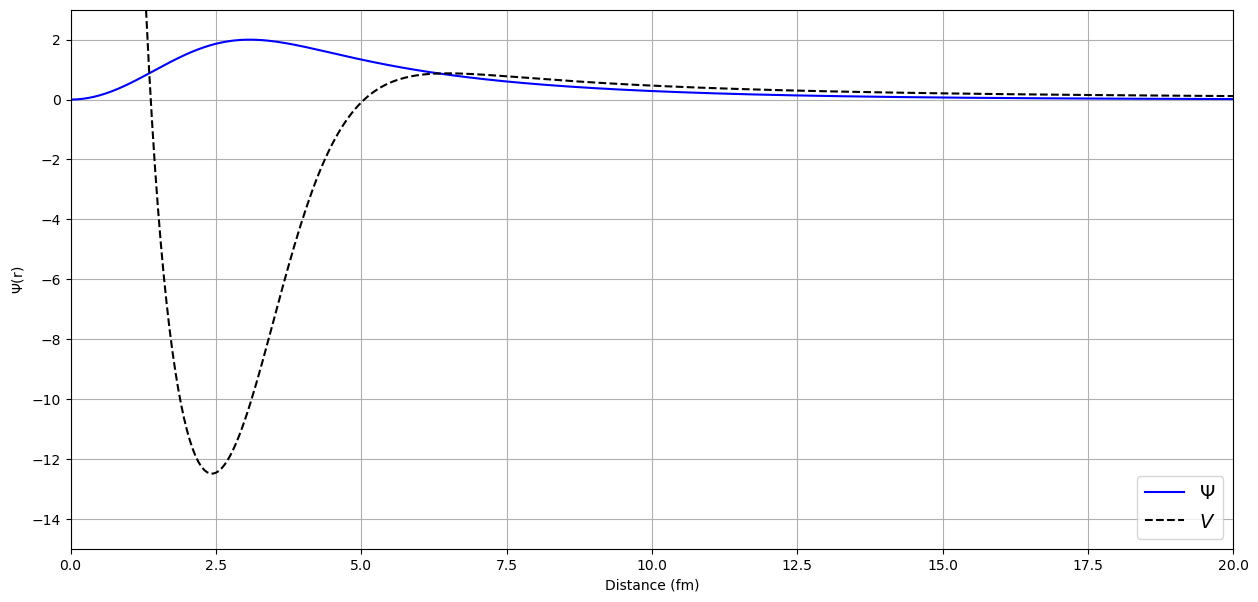

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.rc('axes', labelsize=20)     # fontsize of the axes title
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14) 

ax.plot(r, r*2*sol[:,0]/(r*np.max(sol[:,0])), linestyle='-', color = "blue", label = "$\Psi$")
ax.plot(r, Spin_V(Z_1, Z_2, mu_12, V_0, R, a, l, r)[3], linestyle='--', color = "black", label = "$V$")
ax.set_xlabel('Distance (fm)')
ax.set_ylabel('$\Psi$(r)')
ax.legend(loc = "lower right")
ax.set_xlim(0,20)
ax.set_ylim(-15,3)
ax.grid(True)
#ax.tick_params(left = False, right = False , labelleft = False) 

plt.savefig("WFns.pdf", format="pdf", bbox_inches="tight")
fig.show()

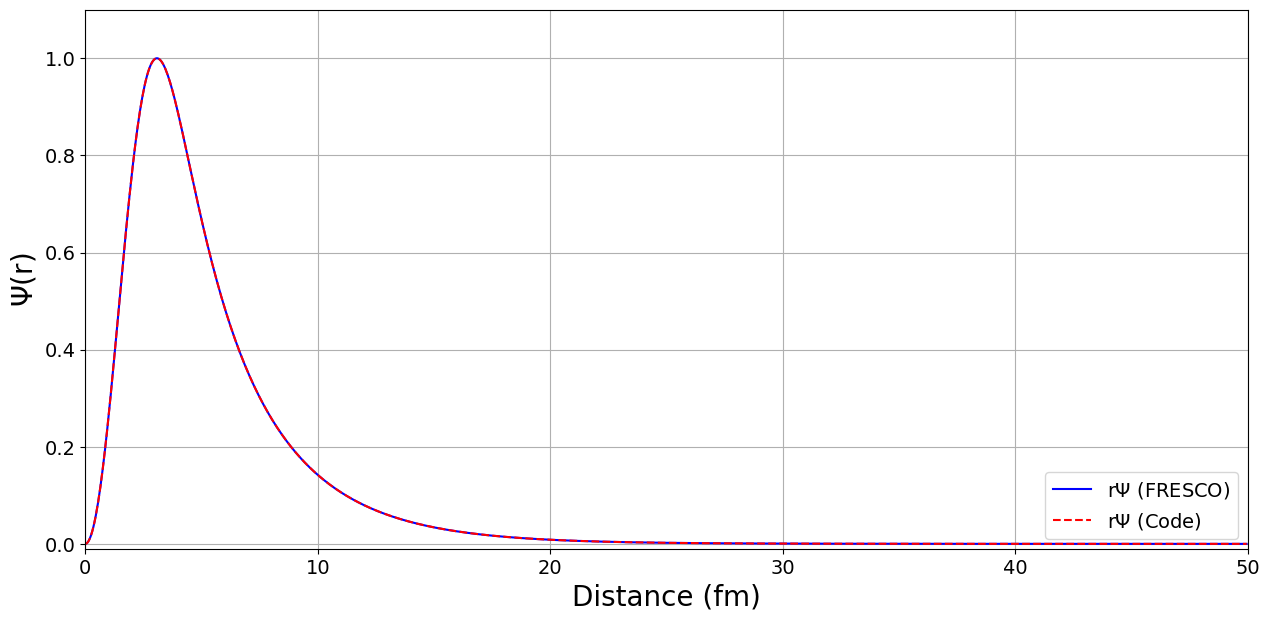

In [42]:


fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.rc('axes', labelsize=20)     # fontsize of the axes title
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14) 

ax.plot(x, y/(np.max(y)), linestyle='-', color = "blue", label = r"r$\Psi$ (FRESCO)")
ax.plot(r, sol[:,0]/((np.max(sol[:,0]))), linestyle='--', color = "red", label = r"r$\Psi$ (Code)")
ax.set_xlabel('Distance (fm)')
ax.set_ylabel(r'$\Psi$(r)')
ax.legend(loc = "lower right")
ax.set_xlim(0,50)
ax.set_ylim(-0.01,1.1)
ax.grid(True)
#ax.tick_params(left = False, right = False , labelleft = False) 

plt.savefig("WFns1.pdf", format="pdf", bbox_inches="tight")
#fig.show()


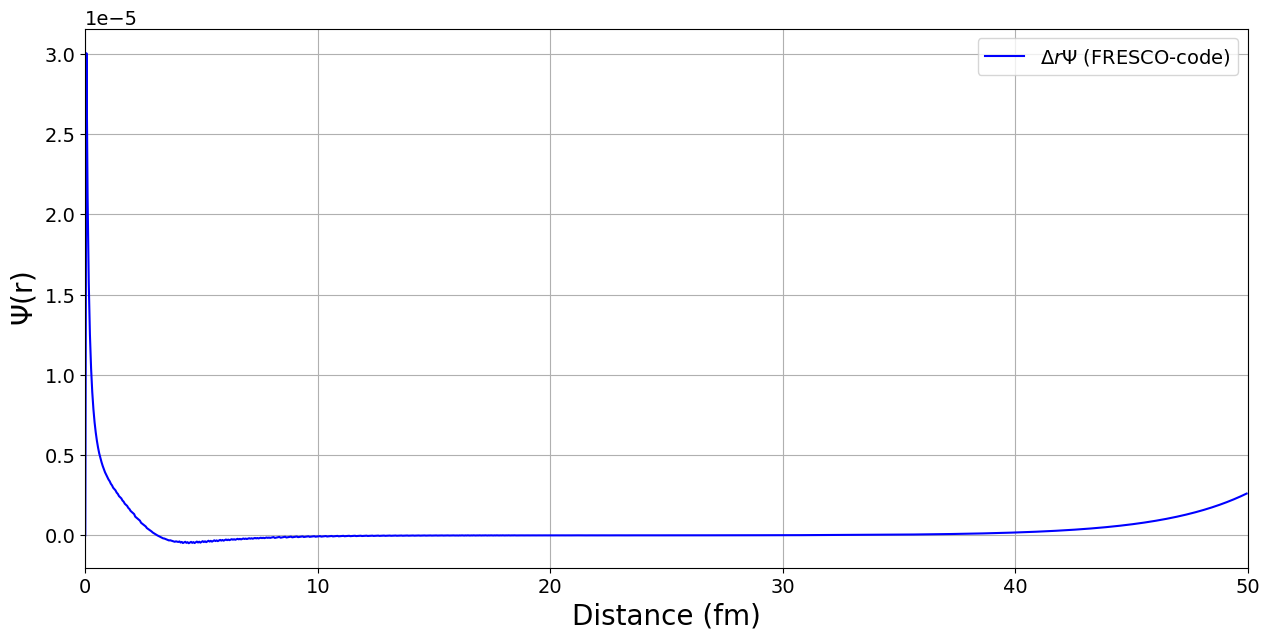

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.rc('axes', labelsize=20)     # fontsize of the axes title
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('font', size=14) 

ax.plot(x, ((y/(np.max(y)))-sol[:,0]/(np.max(sol[:,0]))), linestyle='-', color = "blue", label = r"$\Delta r \Psi$ (FRESCO-code)")
# ax.plot(x, y/(np.max(y)), linestyle='--', color = "blue", label = "r$\Psi$ (FRESCO)")
# ax.plot(r, sol[:,0]/((np.max(sol[:,0]))), linestyle='--', color = "red", label = "r$\Psi$ (Code)")
ax.set_xlabel('Distance (fm)')
ax.set_ylabel(r'$\Psi$(r)')
ax.legend(loc = "best")
ax.set_xlim(0,50)
#ax.set_ylim(-0.01,0.001)
ax.grid(True)
#ax.tick_params(left = False, right = False , labelleft = False) 

#plt.savefig("comparison9Be(1).pdf", format="pdf", bbox_inches="tight")
#fig.show()